In [1]:
import numpy as np
import ceiltrack
import recordreader
from matplotlib import pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
camdata = ceiltrack.genlut()

In [17]:
f = open("../../logs/cl20190707/cycloid-20190707-183638.rec", "rb")

B = np.zeros(3)
track = []
imgs = []

for frdata in recordreader.RecordIterator(f):
    yuv420 = frdata['yuv420']
    img = ((yuv420[:480] > 240) * 255).astype(np.uint8)
    imgs.append(img)
    xy = ceiltrack.match(img, *camdata)
    for i in range(6):
        c, dB = ceiltrack.cost(xy, *B)
        B += dB
    track.append(B.copy())
track = np.array(track)

f.close()

In [ ]:
imgs = np.array(imgs)

In [ ]:
plt.plot(track[:200, 0], track[:200, 1], '-x')
plt.axis('equal')

In [ ]:
plt.imshow(imgs[0])

In [ ]:
imgs.shape

In [ ]:
o = open("data.raw", "wb")
o.write(imgs[:200].reshape(-1).tobytes())
o.close()


In [ ]:
camdata[1].shape

In [ ]:
track[0]

In [5]:
f = open("../../logs/cl20190707/cycloid-20190707-183638.rec", "rb")

B = np.zeros(3)

for frdata in recordreader.RecordIterator(f):
    yuv420 = frdata['yuv420']
    img = ((yuv420[:480] > 240) * 255).astype(np.uint8)
    xy = ceiltrack.match(img, *camdata)
    for i in range(6):
        c, dB = ceiltrack.cost(xy, *B)
        B += dB
        print(i, c, B)
    break

f.close()

[[ 5955.             0.          -430.31539977]
 [    0.          5955.          1227.96554158]
 [ -430.31539977  1227.96554158 13650.26114247]]
[-1040.0867537  -1519.76994523  -310.4085812 ]
0 1109.3479782677591 [0.17501874 0.25405231 0.00540275]
[[ 5955.             0.          -423.67475999]
 [    0.          5955.          1230.27249516]
 [ -423.67475999  1230.27249516 13650.26114247]]
[-1.57085495e-01 -2.03224780e+03 -4.63449933e+01]
1 444.3153310114561 [ 0.17305789  0.60103303 -0.02253361]
[[ 5955.             0.          -457.87431434]
 [    0.          5955.          1217.95805628]
 [ -457.87431434  1217.95805628 13650.26114247]]
[  0.48046736 -67.08628556 -40.87801937]
2 73.12423160168925 [ 0.17313321  0.61188175 -0.02050455]
[[ 5955.             0.          -455.4020643 ]
 [    0.          5955.          1218.88460258]
 [ -455.4020643   1218.88460258 13650.26114247]]
[ 0.00243254 -0.00990786 -0.46577587]
3 72.7183461639427 [ 0.17313545  0.61187631 -0.02046987]
[[ 5955.       

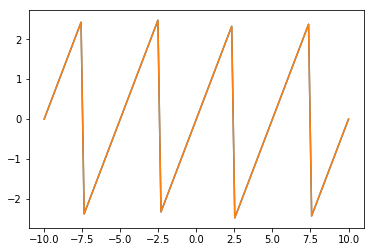

In [30]:
t = np.linspace(-10, 10, 100)
plt.plot(t, np.remainder(t + 2.5, 5.0) - 2.5)
plt.plot(t, 5*(t/5.0 - np.round(t / 5.0)))

In [23]:
f = open("golden.txt", "w")
for t in track:
    f.write("%f %f %f\n" % tuple(t))
f.close()